# Proses machine learning

In [1]:
# import prebuild dataset dari sklearn
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
x = iris.data
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [4]:
x_train.shape, x_test.shape

((105, 4), (45, 4))

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
knn_pred = knn.predict(x_test)

In [7]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, knn_pred))

1.0


In [8]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
dtc_pred = dtc.predict(x_test)

In [10]:
print (metrics.accuracy_score(y_test, dtc_pred))

1.0


In [11]:
print('Score for K-Neighbours is', knn.score(x_test, y_test))
print('Score for Decision Tree is', dtc.score(x_test, y_test))

Score for K-Neighbours is 1.0
Score for Decision Tree is 1.0


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [13]:
knn_model = KNeighborsClassifier()
dtc_model = DecisionTreeClassifier()
cv_knn = cross_val_score(estimator=knn_model, X=x, y=y, cv=5)
cv_dtc = cross_val_score(estimator=dtc_model, X=x, y=y, cv=5)

print('Cross Validate Score for KNN is :', round(cv_knn.mean(), 3))
print('Cross Validate Score for DTC is :', round(cv_dtc.mean(), 3))

Cross Validate Score for KNN is : 0.973
Cross Validate Score for DTC is : 0.953


ternyata lebih bagus pake k-nearest neighbors classifier...

sekarang kita bikin contoh...

In [14]:
contoh = [[2,5,4,2], [2,4,4,5]]
prediksi = knn.predict(contoh)
prediksi_spesies = [iris.target_names [p] for p in prediksi]
print ("prediksinya adalah ", prediksi_spesies)

prediksinya adalah  ['versicolor', 'virginica']


In [15]:
# import joblib
# joblib.dump(knn, 'mlbrain.joblib')

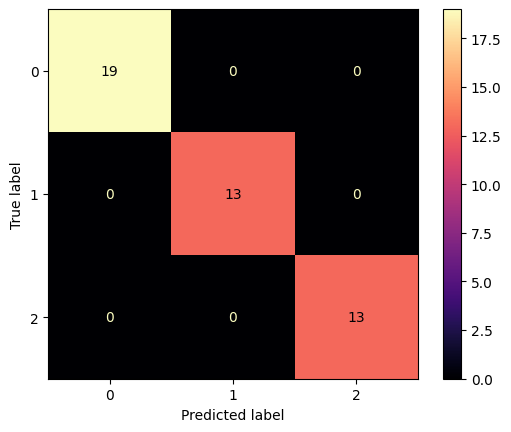

In [24]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=knn_pred, cmap='magma');

In [23]:
print(classification_report(y_pred=knn_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

